<a href="https://colab.research.google.com/github/surya333356/OIBSIP_Task-1_Retail_Sales_EDA_Project/blob/main/Task_1_Retail_Sales_EDA_Project(Oasis_Infobyte_Surya_Singh)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales EDA Project Task-1



 **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -** SURYA SINGH


# **Project Summary -**

Welcome to the Retail Sales and Customer Demographics Dataset! This synthetic dataset has been meticulously crafted to simulate a dynamic retail environment, providing an ideal playground for those eager to sharpen their data analysis skills through exploratory data analysis (EDA). With a focus on retail sales and customer characteristics, this dataset invites you to unravel intricate patterns, draw insights, and gain a deeper understanding of customer behavior.

This dataset is a snapshot of a fictional retail landscape, capturing essential attributes that drive retail operations and customer interactions. It includes key details such as Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, and Total Amount. These attributes enable a multifaceted exploration of sales trends, demographic influences, and purchasing behaviors.

# **GitHub Link -**

https://github.com/surya333356/OIBSIP_Task-1_Retail_Sales_EDA_Project.git

# **Problem Statement**


1.How does customer age and gender influence their purchasing behavior?

2.Are there discernible patterns in sales across different time periods?

3.Which product categories hold the highest appeal among customers?

4.What are the relationships between age, spending, and product preferences?

5.How do customers adapt their shopping habits during seasonal trends?

6.Are there distinct purchasing behaviors based on the number of items bought per transaction?

7.What insights can be gleaned from the distribution of product prices within each category?





#### **Define Your Business Objective?**

The objective of the Retail Sales EDA Project is to analyze sales data to uncover trends, understand customer behavior, optimize inventory, evaluate store performance, and enhance profitability. The goal is to use these insights to make informed decisions that boost sales and improve overall business efficiency.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv
import ast
from datetime import datetime

In [2]:
# Used to display all hidden columns
pd.set_option('display.max_columns',None)

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/OASIS INFOBYTE INTERN/Task-1/retail_sales_dataset.csv'

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
rs=pd.read_csv(path)
rs

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
# Creating a duplicate copy of original dataset before making any changes it
rs1=rs.copy()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rs.shape

(1000, 9)

### Dataset Information

In [ ]:
# Dataset Info
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
rs.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
rs1.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


### What did you know about your dataset?

We have no missing values. So now we have moved to further analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
rs1.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
# Dataset Describe
rs1.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### Variables Description

**Transaction ID:** A unique identifier for each transaction, allowing tracking and reference.

**Date:** The date when the transaction occurred, providing insights into sales trends over time.

**Customer ID:** A unique identifier for each customer, enabling customer-centric analysis.

**Gender:** The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

**Age:** The age of the customer, facilitating segmentation and exploration of age-related influences.

**Product Category:** The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

**Quantity:** The number of units of the product purchased, contributing to insights on purchase volumes.

**Price per Unit:** The price of one unit of the product, aiding in calculations related to total spending.

**Total Amount:** The total monetary value of the transaction, showcasing the financial impact of each purchase.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(rs1.apply(lambda col : col.unique()))


Transaction ID      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Date                [2023-11-24, 2023-02-27, 2023-01-13, 2023-05-2...
Customer ID         [CUST001, CUST002, CUST003, CUST004, CUST005, ...
Gender                                                 [Male, Female]
Age                 [34, 26, 50, 37, 30, 45, 46, 63, 52, 23, 35, 2...
Product Category                      [Beauty, Clothing, Electronics]
Quantity                                                 [3, 2, 1, 4]
Price per Unit                                 [50, 500, 30, 25, 300]
Total Amount        [150, 1000, 30, 500, 100, 50, 600, 200, 75, 15...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Make new columns for analysis
# first make Age group column
def categorize_age(Age):
  if Age<30:
    return 'Teenager'
  elif 30<=Age<50:
    return 'Adult'
  else:
    return 'Senior'
# Creating new column
rs1['Age group']=rs1['Age'].apply(categorize_age)
rs1.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Adult
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Teenager
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Senior
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Adult
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Adult


In [ ]:
rs1.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age group
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Senior
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Senior
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Teenager
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Adult
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120,Adult


In [ ]:
# Second make month column for monthwise analysis
# Convert 'Date' column to datetime
rs1['Date'] = pd.to_datetime(rs1['Date'])

# Extract month from 'Date' and create 'Month' column
# rs1['Month'] = rs1['Date'].dt.month
# Extract month as name (e.g., 'Jan', 'Feb', etc.) and create 'Month' column
rs1['Month'] = rs1['Date'].dt.strftime('%b')
rs1

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age group,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Adult,Nov
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Teenager,Feb
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Senior,Jan
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Adult,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Adult,May
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Senior,May
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Senior,Nov
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Teenager,Oct
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Adult,Dec


In [ ]:
# Final data check
rs1.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age group,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Adult,Nov
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Teenager,Feb
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Senior,Jan
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Adult,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Adult,May


### What all manipulations have you done and insights you found?

We have done few manipulations in the Data.

----Addition of columns----

We have seen that there are few columns required in Data to analysis purpose which can be evaluated from the given columns.

a) Age Group: This columns will help us to know that according to different age
   group shopping behaviour and their interest in shopping.

b) Month: By this column we analys the data by month and know trends with the help of month.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  
How does customer age and gender influence their purchasing behavior?

In [ ]:
purchase_behaviour=rs1.groupby(['Age group','Gender'])['Total Amount'].sum().reset_index()
purchase_behaviour

,Age group,Gender,Total Amount
0,Adult,Female,97550
1,Adult,Male,92140
2,Senior,Female,71765
3,Senior,Male,71390
4,Teenager,Female,63525
5,Teenager,Male,59630


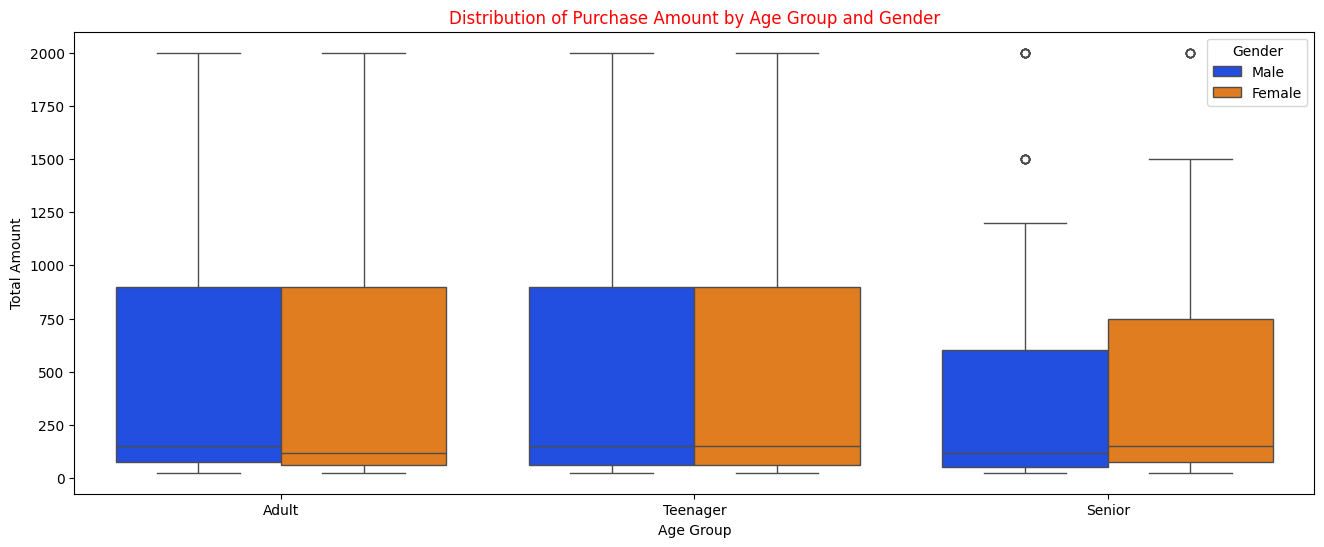

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(16,6))
sns.boxplot(x='Age group', y='Total Amount', hue='Gender', data=rs1, palette='bright')
plt.title('Distribution of Purchase Amount by Age Group and Gender',color='red')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.legend(title='Gender')
plt.show()


##### 1. Why did you pick the specific chart?

Box plots are useful for visualizing the distribution of data and identifying key statistics like median, quartiles, and outliers. Here’s what you can derive from creating box plots for each gender across different age groups:

##### 2. What is/are the insight(s) found from the chart?

1.Female adults have a higher total amount than male adults.

2.Senior gender spending is nearly identical.

3.Female teenagers spend more than male teenagers.

#### Chart - 2
Are there discernible patterns in sales across different time periods?

In [ ]:
# Aggregate sales data by month
monthly_sales = rs1.groupby(['Month'])['Total Amount'].sum().reset_index()
monthly_sales =monthly_sales.sort_values(by='Total Amount',ascending=False).reset_index()
monthly_sales

,index,Month,Total Amount
0,8,May,53150
1,10,Oct,46580
2,2,Dec,44690
3,3,Feb,44060
4,4,Jan,36980
5,1,Aug,36960
6,6,Jun,36715
7,5,Jul,35465
8,9,Nov,34920
9,0,Apr,33870


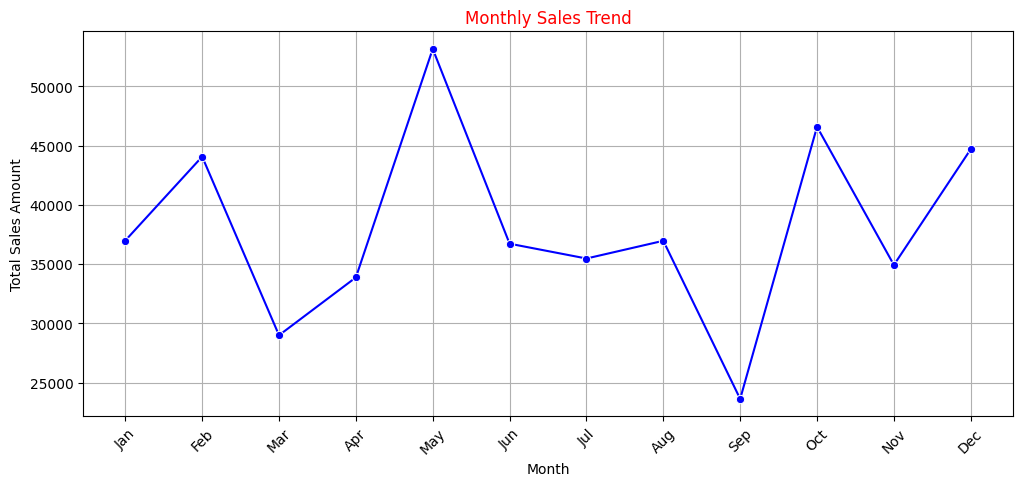

In [ ]:
# Chart - 2 visualization code
# Define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'Month' column to categorical with the specified order
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'Month' column
monthly_sales = monthly_sales.sort_values('Month')
# Plot monthly sales data
plt.figure(figsize=(12, 5))
sns.lineplot(x='Month', y='Total Amount', data=monthly_sales, marker='o', color='b')
plt.title('Monthly Sales Trend',color='red')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

We have chosen the line chart because we want to analyze over time and how trends go on over time.

##### 2. What is/are the insight(s) found from the chart?

1.May is the highest spending month, while September is the lowest.

2.Spending seems to follow a trend of being higher in the spring and summer months, and lower in the fall and winter.

3.The data highlights potential seasonal trends, which could be useful for forecasting and planning.

#### Chart - 3
Which product categories hold the highest appeal among customers?

In [ ]:
# Aggregate sales data by product category
category_sales = rs1.groupby('Product Category')['Total Amount'].sum().reset_index()

# Sort categories by total sales amount in descending order
category_sales = category_sales.sort_values(by='Total Amount', ascending=False)
category_sales

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


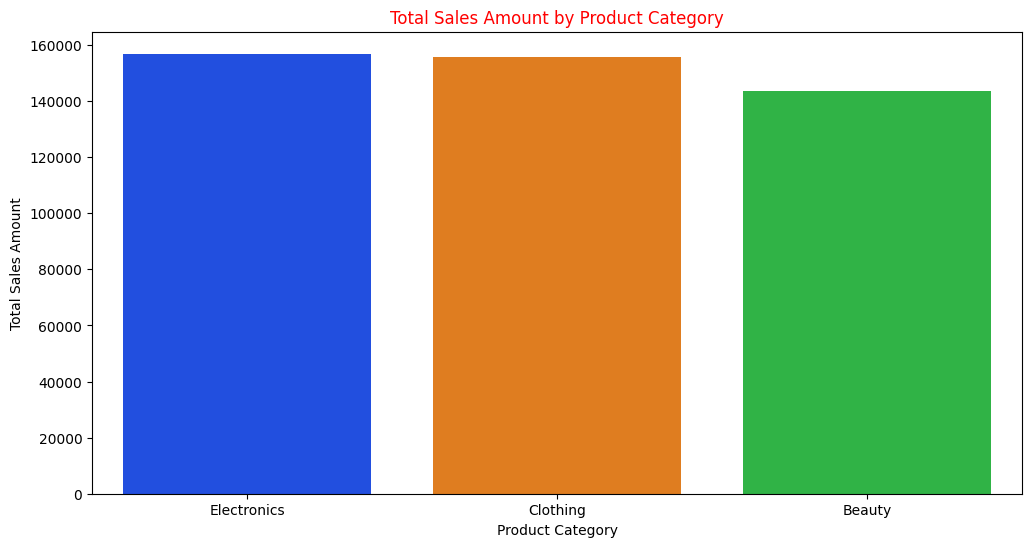

In [ ]:
# Chart - 3 visualization code

# Plot total sales by product category
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Total Amount',hue='Product Category', data=category_sales, palette='bright')
plt.title('Total Sales Amount by Product Category',color='red')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

##### 1. Why did you pick the specific chart?

We pick bar chart for this problem to compare different categories or groups to show total sale in each category.

##### 2. What is/are the insight(s) found from the chart?

We have clearly seen that according to the above visualisation that customers spent maximum spent in Electronics and Clothing category and minimum spent in beauty category.

#### Chart - 4
What are the relationships between age, spending, and product preferences?

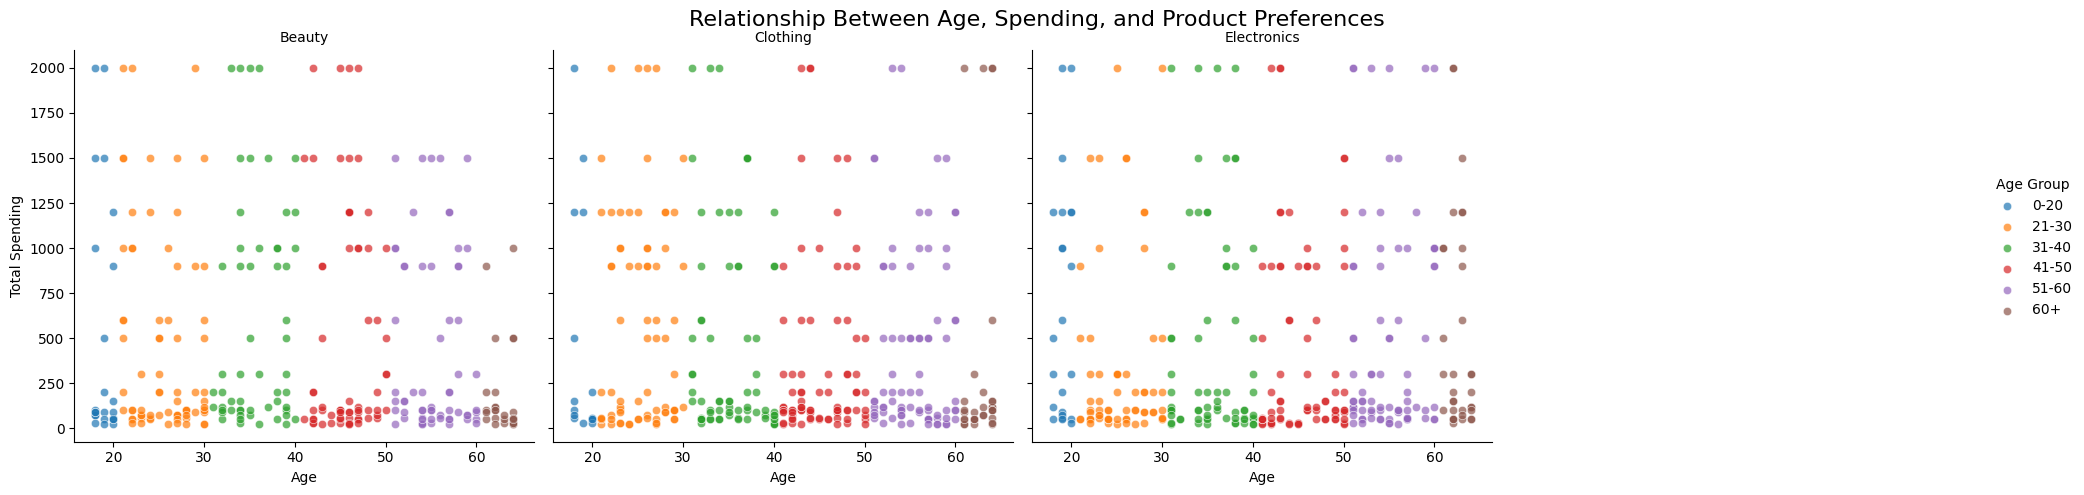

In [ ]:
# Chart - 4 visualization code
# Create bins for Age groups
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
rs1['Age Group'] = pd.cut(rs1['Age'], bins=age_bins, labels=age_labels)

# Create a FacetGrid to visualize the relationships
g = sns.FacetGrid(rs1, col="Product Category", hue="Age Group", col_wrap=4, height=5)
g.map(sns.scatterplot, "Age", "Total Amount", alpha=.7)
g.add_legend()

# Adjust the titles and layout
g.fig.suptitle('Relationship Between Age, Spending, and Product Preferences', fontsize=16)
g.set_titles("{col_name}")
g.set_axis_labels("Age", "Total Spending")
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()

##### 1. Why did you pick the specific chart?

We use scatter plots in this problem to examine the relationship between two numerical variables like total spending and age.

##### 2. What is/are the insight(s) found from the chart?

1.Adults(30-50) show the highest preference for Beauty products.

2.Seniors(above 50) spend the most on Electronics.

3.Teenagers(below 30) have relatively balanced spending between Beauty and Clothing, with less on Electronics.

#### Chart - 5
How do customers adapt their shopping habits during seasonal trends?

<Figure size 1400x800 with 0 Axes>

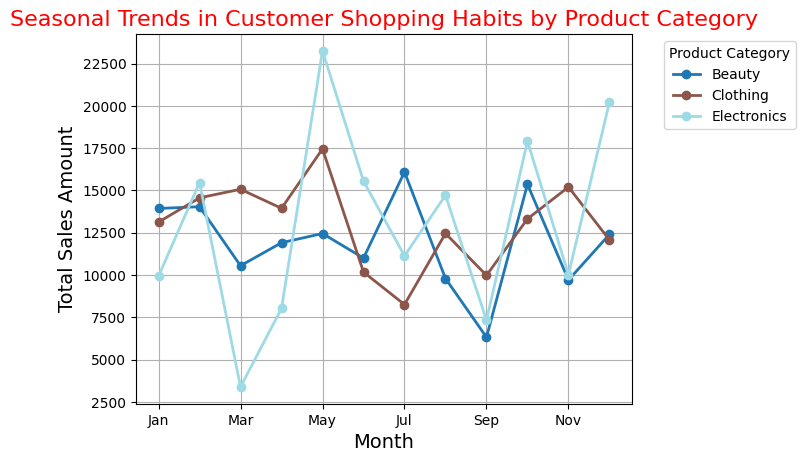

In [ ]:
# Chart - 5 visualization code
# Convert 'Date' to datetime format
rs1['Date'] = pd.to_datetime(rs1['Date'])

# Extract month and year from 'Date'
rs1['Month'] = rs1['Date'].dt.month_name().str[:3]  # e.g., 'Jan', 'Feb'
rs1['Year'] = rs1['Date'].dt.year

# Aggregate sales data by Month and Product Category
monthly_sales = rs1.groupby(['Year', 'Month', 'Product Category'])['Total Amount'].sum().reset_index()

# Create a pivot table to get sales for each product category by month
pivot_sales = monthly_sales.pivot_table(index='Month', columns='Product Category', values='Total Amount', aggfunc='sum')

# Order months correctly
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_sales = pivot_sales.reindex(ordered_months)

# Plot the seasonal trends using a line plot
plt.figure(figsize=(14, 8))
pivot_sales.plot(kind='line', marker='o', colormap='tab20', linewidth=2)

# Customize the plot
plt.title('Seasonal Trends in Customer Shopping Habits by Product Category', fontsize=16, color='red')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

We take this chart to show trends over time for different category.

##### 2. What is/are the insight(s) found from the chart?

1.We can see from the above visulaisation that in May month Electronics and clothing category shown the max sale and in July month Beauty cat shown the max sale.

2.The trend shown max sale in Summer season and min sale in winter season.

#### Chart - 6
Are there distinct purchasing behaviors based on the number of items bought per transaction?

<ipython-input-27-7e923807baf0>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spending = rs1.groupby('Items Category')['Total Amount'].mean().reset_index()


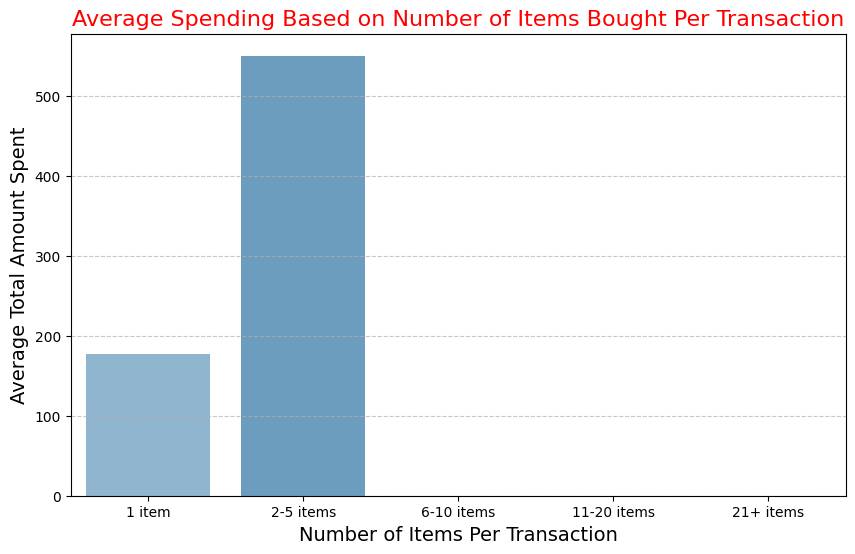

In [ ]:
# Chart - 6 visualization code
# Step 1: Calculate the total number of items per transaction
rs1['Total Items'] = rs1.groupby('Transaction ID')['Quantity'].transform('sum')

# Step 2: Segment transactions based on the number of items bought
bins = [1, 2, 5, 10, 20, 50]  # Define bins for the number of items
labels = ['1 item', '2-5 items', '6-10 items', '11-20 items', '21+ items']  # Labels for each bin
rs1['Items Category'] = pd.cut(rs1['Total Items'], bins=bins, labels=labels, right=False)

# Step 3: Calculate the average total amount spent per segment
average_spending = rs1.groupby('Items Category')['Total Amount'].mean().reset_index()

# Step 4: Plot the average spending per item category
plt.figure(figsize=(10, 6))
sns.barplot(x='Items Category', y='Total Amount',hue='Items Category', data=average_spending, palette='Blues_d')

# Customizing the plot
plt.title('Average Spending Based on Number of Items Bought Per Transaction', fontsize=16, color='red')
plt.xlabel('Number of Items Per Transaction', fontsize=14)
plt.ylabel('Average Total Amount Spent', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

we taken this bar chart because we want to compare different transaction category.

##### 2. What is/are the insight(s) found from the chart?

From the above visualisation,we can say that Average Spending which is max Based on Number of 2-5 Items Bought Per Transaction.

#### Chart - 7
What insights can be gleaned from the distribution of product prices within each category?

In [ ]:
# Step 1: Group data by 'Product Category' and calculate summary statistics for 'Price per Unit'
price_summary = rs1.groupby('Product Category')['Price per Unit'].describe().reset_index()

# Display the summary statistics
price_summary

,Product Category,count,mean,std,min,25%,50%,75%,max
0,Beauty,307.0,184.055375,194.929399,25.0,30.0,50.0,300.0,500.0
1,Clothing,351.0,174.287749,186.017065,25.0,30.0,50.0,300.0,500.0
2,Electronics,342.0,181.900585,189.049673,25.0,30.0,50.0,300.0,500.0


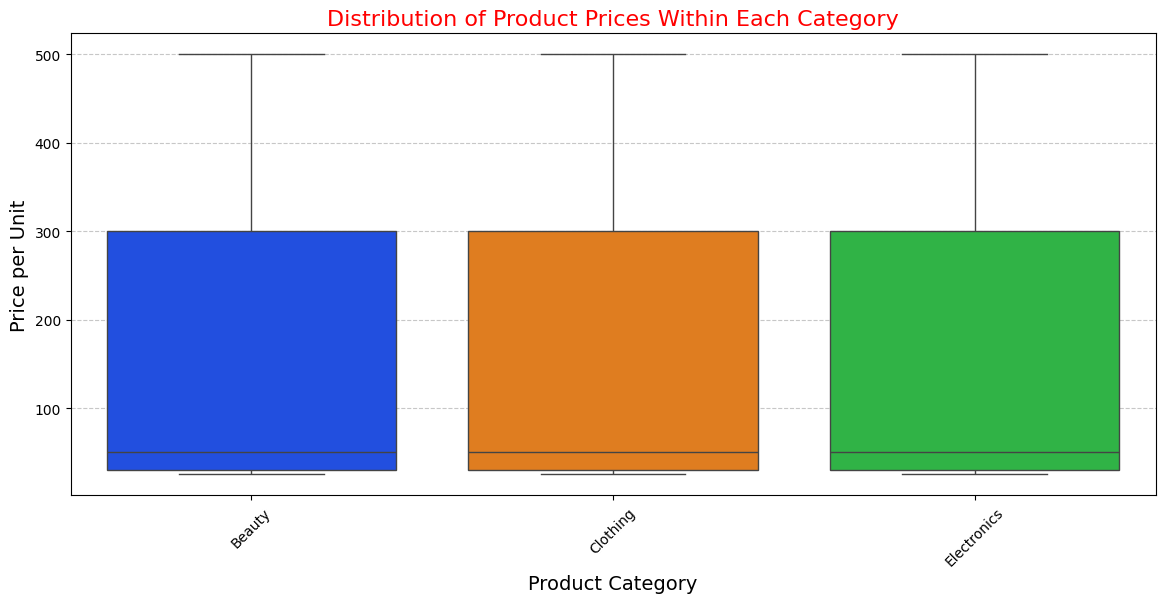

In [ ]:
# Chart - 7 visualization code
# Step 1: Plot the price distribution for each product category
plt.figure(figsize=(14, 6))
sns.boxplot(x='Product Category', y='Price per Unit',hue='Product Category', data=rs1, palette='bright')

# Step 2: Customize the plot
plt.title('Distribution of Product Prices Within Each Category', fontsize=16, color='red')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Price per Unit', fontsize=14)
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 3: Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Using a box plot for this data would visually highlight these patterns, showing the central tendency, spread, and outliers for each product category, making it easier to compare them.

##### 2. What is/are the insight(s) found from the chart?

**Similar Distribution:** All three categories have similar values for the quartiles (25%, 50%, 75%), indicating that the distribution of the data is quite similar across the categories.

**Mean vs. Median:** The mean values are higher than the medians, suggesting that the data might be skewed to the right (positive skew), possibly due to higher-value outliers.

**Variability:** The standard deviations are also quite high relative to the means, which suggests a wide spread in the data values for each category.

**Outliers:** With a maximum value of 500 and relatively lower quartiles, it's likely that there are some outliers that are pulling the mean up. The box plot visualization would help in confirming this by clearly showing these outliers.

#### Chart - 8
Correlation Heatmap

In [ ]:
corr1=rs1.select_dtypes(include=['int64','float64'])
corr1.corr()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Total Items
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034,-0.026623
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568,-0.023737
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707,1.000000
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925,0.017501
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000,0.373707
Total Items,-0.026623,-0.023737,1.000000,0.017501,0.373707,1.000000


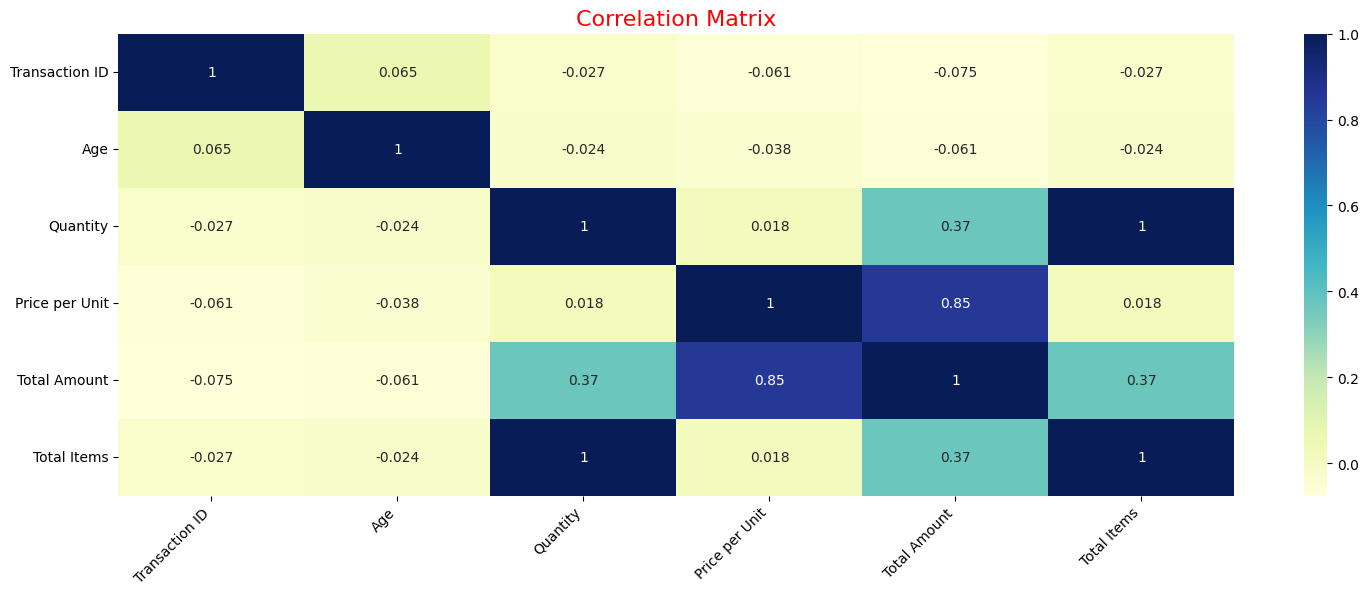

In [ ]:
# Correlation Heatmap visualization code
fig = plt.figure(figsize=(18, 6))
sns.heatmap(corr1.corr(), annot=True, cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix', fontsize=16, color='red')
plt.show()

##### 1. Why did you pick the specific chart?

heatmaps are an effective tool in EDA for understanding relationships between variables, detecting patterns, and simplifying complex datasets.

##### 2. What is/are the insight(s) found from the chart?

**Quantity, Total Items_x, Total Items_y, and Total Items:** These variables have a perfect correlation (1.000000) with each other. This suggests that these variables are either the same or extremely similar, meaning they might be duplicates or derived from the same data. Including all of them might be redundant.

**Price per Unit and Total Amount:** The correlation is 0.851925, indicating a strong positive relationship. This makes sense because the total amount is likely calculated by multiplying the quantity by the price per unit.

**What to Consider:**

**Data Redundancy:** The perfect correlations between Quantity, Total Items_x, Total Items_y, and Total Items suggest that you may want to drop some of these variables to avoid redundancy.

**Key Relationships:** Focus on the strong positive correlation between Price per Unit and Total Amount when analyzing pricing strategies or sales performance.

#### Chart - 15 - Pair Plot

<Figure size 1500x600 with 0 Axes>

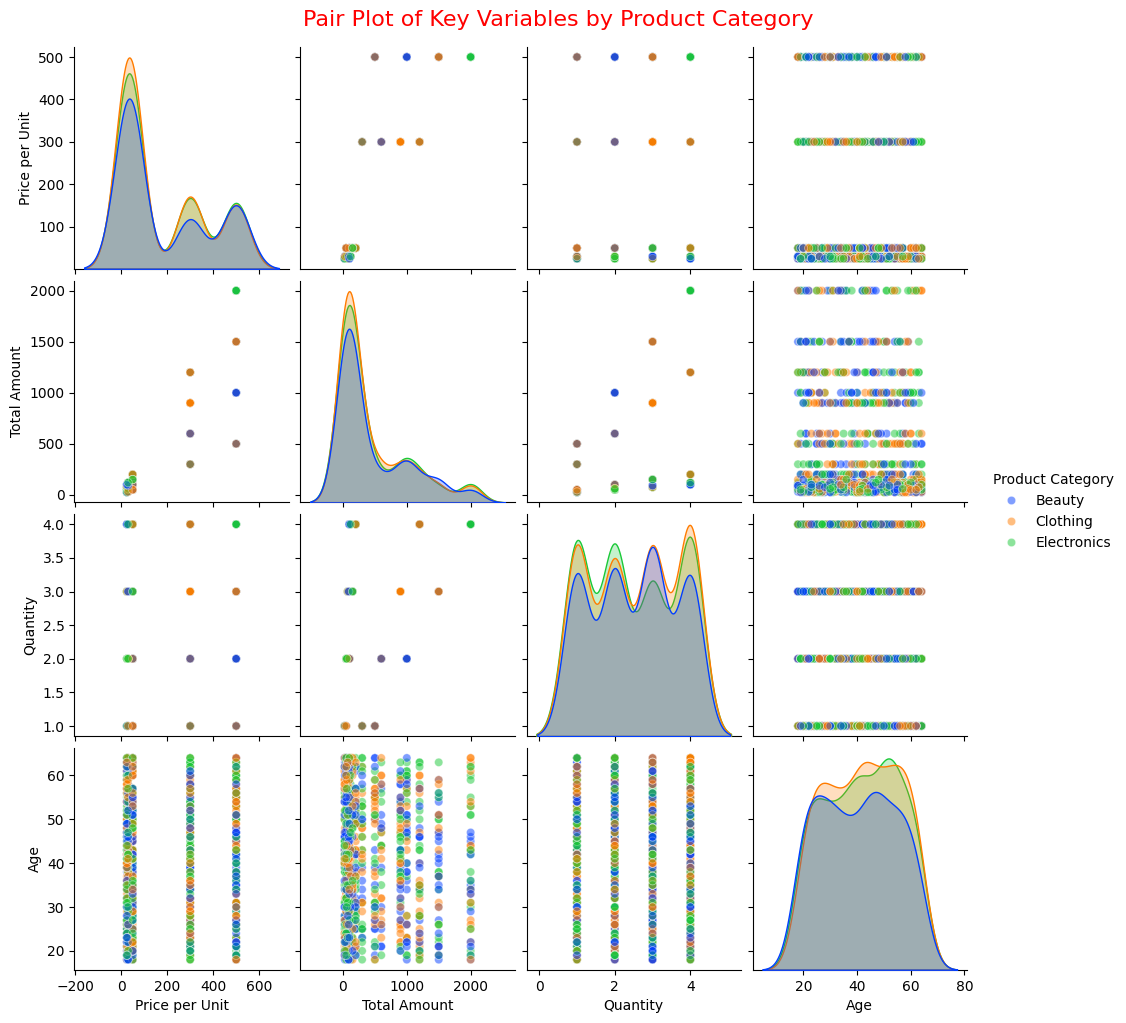

In [ ]:
# Pair Plot visualization code
# Define the columns to include in the pair plot
fig = plt.figure(figsize=(15, 6))
columns = ['Price per Unit', 'Total Amount', 'Quantity', 'Age']

# Create the pair plot with hue and palette
sns.pairplot(rs1[columns + ['Product Category']], hue='Product Category', palette='bright', diag_kind='kde', plot_kws={'alpha':0.5})

# Customize the plot
plt.suptitle('Pair Plot of Key Variables by Product Category', y=1.02, fontsize=16, color='red')
plt.show()

##### 1. Why did you pick the specific chart?

pair plots are an excellent tool in EDA for getting a broad overview of relationships, distributions, and patterns across multiple variables, all in one visual.









##### 2. What is/are the insight(s) found from the chart?

This analysis shows you a comprehensive understanding of how these four variables interact with each other in your dataset.

## **5. Solution to Business Objective**

**Targeted Marketing:**

**For Female Adults:** Launch promotions and product bundles to leverage their
  higher spending power.

**For Teenagers:** Increase marketing for Beauty and Clothing items.
  
  **Seasonal Strategy:**

**Spring/Summer:** Boost inventory and promotions for Electronics and Clothing.

**Fall/Winter:** Adjust inventory and marketing for lower spending periods.

**Category Focus:**

**Electronics and Clothing:** Expand offerings and run targeted sales events,
  especially in May.

**Beauty:** Reassess product lineup and marketing strategies, focusing on July
  for promotions.

**Age-Based Products:**

**Adults (30-50):** Highlight Beauty products in promotions.

**Seniors (50+):** Focus on Electronics.

**Teenagers (<30):** Offer balanced promotions for Beauty and Clothing.

**Optimize Spending:**

**Item Quantity:** Tailor promotions based on average spending for transactions of 2-5 items.

**Pricing Strategy:**

Leverage the strong correlation between Price per Unit and Total Amount to refine pricing strategies and maximize revenue.

# **Conclusion**

1.Female adults have a higher total amount than male adults,Senior  
  gender spending is nearly identical,Female teenagers spend more than male teenagers.

2.May is the highest spending month, while September is the lowest.
  Spending seems to follow a trend of being higher in the spring and summer months, and lower in the fall and winter.
  The data highlights potential seasonal trends, which could be useful for forecasting and planning.

3.Customers spent maximum spent in Electronics and Clothing category and  
  minimum spent in beauty category.

4.Adults(30-50) show the highest preference for Beauty products.
  Seniors(above 50) spend the most on Electronics.
  Teenagers(below 30) have relatively balanced spending between Beauty and Clothing, with less on Electronics.

5.May month Electronics and clothing category shown the max sale and in July
  month Beauty cat shown the max sale.
  The trend shown max sale in Summer season and min sale in winter season.

6.Average Spending which is max Based on Number of 2-5 Items Bought
  Per Transaction.

7.All three categories have similar values for the quartiles (25%, 50%, 75%),
  indicating that the distribution of the data is quite similar across the categories.

8.Focus on the strong positive correlation between Price per Unit and Total
  Amount when analyzing pricing strategies or sales performance.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***